<a href="https://colab.research.google.com/github/AvisP/Nest-Seq-Analysis/blob/main/notebooks/Notmat2dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
base_path = '/content/gdrive/My Drive/ZFDataset/'

In [ ]:
# syllable_df_Nest_Total = pd.read_pickle(base_path+'Nest1_Densenet121.pkl')

In [ ]:
# syllable_df_Nest_Total

In [ ]:
# Nest1 = pd.read_pickle(base_path+'zf_Nest1_noRescale1.pickle')

In [ ]:
# Nest1

In [4]:
ls

gdrive/  sample_data/


In [5]:
!git clone https://github.com/AvisP/Nest-Seq-Analysis.git

Cloning into 'Nest-Seq-Analysis'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 122 (delta 35), reused 53 (delta 4), pack-reused 0
Receiving objects: 100% (122/122), 3.67 MiB | 7.70 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [6]:
cd Nest-Seq-Analysis/

/content/Nest-Seq-Analysis


In [7]:
ls

avgn/  models/  notebooks/  README.md  scripts/


In [8]:
pip install pathlib2

In [9]:
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm
import pandas as pd
pd.options.display.max_columns = None
import librosa
from datetime import datetime
import numpy as np
import pathlib2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


In [12]:
import avgn
from avgn.custom_parsing.bengalese_finch_sakata import (
    generate_json_wav_not_mat,
    parse_song_df,
)
from avgn.utils.paths import DATA_DIR

In [10]:
DATASET_ID = 'zebra_finch_sakata'
species = "Taeniopygia guttata"
common_name = "Zebra Finch"

DT_ID = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
DT_ID

'2021-07-08_02-57-54'

Clear out the directory if runing a seperate nest or new bird, else the files from previous run will get carried over. Ignore if running for first time

In [60]:
# For clearing out the contents of WAV and JSON files from last run
import os, shutil
folder_JSON = "/".join(['/content/Nest-Seq-Analysis/data/processed/zebra_finch_sakata',DT_ID,'JSON'])
folder_WAV = "/".join(['/content/Nest-Seq-Analysis/data/processed/zebra_finch_sakata',DT_ID,'WAV'])

def remove_files_given_folder(folder):
  for filename in os.listdir(folder):
      file_path = os.path.join(folder, filename)
      try:
          if os.path.isfile(file_path) or os.path.islink(file_path):
              os.unlink(file_path)
          elif os.path.isdir(file_path):
              shutil.rmtree(file_path)
      except Exception as e:
          print('Failed to delete %s. Reason: %s' % (file_path, e))

remove_files_given_folder(folder_JSON)
remove_files_given_folder(folder_WAV)

Set folder/(s) or Nest name here

In [62]:
# DSLOC = avgn.utils.paths.Path('I:/ZebraFinchGenerations/Nest5')
DSLOC = avgn.utils.paths.Path('/content/gdrive/MyDrive/ZFDataset/Nest5')
DSLOC

PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest5')

If there are lots of files preferable to process indvidual birds and then concatenate the seperate dataframes into 1 Nest else use the multiple folder processing

## DSLOC is single folder 


In [53]:
WAVLIST = list((DSLOC).expanduser().glob('*.wav'))
len(WAVLIST), WAVLIST[0]

MATLIST = list((DSLOC).expanduser().glob('*.wav.not.mat'))
len(MATLIST), MATLIST[0]

song_df = parse_song_df(WAVLIST,MATLIST)

song_df[:3]

wav_names = np.array([i.name for i in WAVLIST])

IndexError: ignored

In [ ]:
wav_names

array(['vstd_42628292.wav', 'vstd_36106201.wav', 'vstd_43722461.wav',
       'vstd_43884779.wav', 'vstd_31268092.wav', 'vstd_39044041.wav',
       'vstd_33957441.wav', 'vstd_33736341.wav', 'vstd_43619969.wav',
       'vstd_34586941.wav', 'vstd_43287782.wav', 'vstd_41847011.wav',
       'vstd_34785463.wav', 'vstd_31123682.wav', 'vstd_35780572.wav',
       'vstd_30431169.wav', 'vstd_30514399.wav', 'vstd_31185069.wav',
       'vstd_32637679.wav', 'vstd_34462842.wav', 'vstd_35675962.wav',
       'vstd_36661719.wav', 'vstd_38630212.wav', 'vstd_41913452.wav',
       'vstd_44505281.wav', 'vstd_44689342.wav', 'vstd_46563391.wav',
       'vstd_46842399.wav', 'vstd_48308972.wav', 'vstd_47747992.wav',
       'vstd_47747992_Copy.wav'], dtype='<U22')

## DSLOC has multiple folders

Jump to Common Section part if using Single Folder section

In [64]:
folder_list = list((DSLOC).expanduser().glob('*'))

WAVPATH = []

for idx, folder_path in enumerate(folder_list):
    WAVLIST = list((pathlib2.Path(folder_path.parent,folder_path.parts[-1])).expanduser().glob('*.wav'))
    MATLIST = list((pathlib2.Path(folder_path.parent,folder_path.parts[-1])).expanduser().glob('*.wav.not.mat'))
    song_temp = parse_song_df(WAVLIST,MATLIST)
    if idx == 0:
        song_df = song_temp
        wav_names = np.array([i.name for i in WAVLIST])
        WAVPATH = WAVLIST
    else:
        song_df = pd.concat([song_df, song_temp], axis=0, ignore_index=True)
        wav_names = np.concatenate((wav_names, np.array([i.name for i in WAVLIST])), axis=0)
        WAVPATH = WAVPATH + WAVLIST
    
# song_df = song_df.drop(columns='index')
WAVLIST = WAVPATH





  0%|          | 0/40 [00:00<?, ?it/s]



 38%|███▊      | 15/40 [00:00<00:00, 146.07it/s]

Expected wav file format structure : wh70bk90_May_07_2020_26053151_Copy.wav
All wav files have corresponding not.mat files






100%|██████████| 40/40 [00:00<00:00, 137.65it/s]




  0%|          | 0/37 [00:00<?, ?it/s]



 41%|████      | 15/37 [00:00<00:00, 144.27it/s]

Expected wav file format structure : wh70bk90_May_07_2020_26053151_Copy.wav
All wav files have corresponding not.mat files






100%|██████████| 37/37 [00:00<00:00, 133.27it/s]


If warning messages about missing wav or .not.mat files then go to dataset and check if all audio files have corresponding .not.mat files before proceeding

In [65]:
WAVLIST

[PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_36251927.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_39036906.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_38473932.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_38075592_Copy.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_38075592.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_37993396.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_37782236_Copy.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_37782236.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_36673072.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_36395056.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_42835196_Copy1.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_42835196_Copy.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDatas

# Common section for both


In [66]:
Parallel(n_jobs=1, verbose=10)(
    delayed(generate_json_wav_not_mat)(row, WAVLIST, wav_names, DT_ID, species, common_name, DATASET_ID)
    for idx, row in tqdm(song_df.iterrows(), total=len(song_df))
);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_39036906.wav
/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_38075592_Copy.wav
/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_38473932.wav
/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_38075592.wav
/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_37993396.wav
/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_37782236_Copy.wav
/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_37782236.wav
/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_36673072.wav
/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_36395056.wav
/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_36251927.wav
/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_44201306.wav
/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_47997075.wav
/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_42835196_Copy1.wav
/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_42835196_Copy.wav
/content/gdrive/MyDrive/ZFDataset/Nest5/tbfk/tbfk_42835196.wav
/content/gdrive/MyDrive/ZFDataset/

[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   31.1s finished


In [ ]:
pip install noisereduce

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
#import umap
import pandas as pd

from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet

from avgn.signalprocessing.create_spectrogram_dataset import prepare_wav, create_label_df, get_row_audio
from avgn.visualization.spectrogram import plot_spec
from avgn.song_segmentation.dynamic_thresholding import norm

In [67]:
DATASET_ID = 'zebra_finch_sakata'

hparams = HParams(
    n_fft = 4096,
    mel_lower_edge_hertz=500,
    mel_upper_edge_hertz=15000,  # Should be sample_rate / 2 or less
    butter_lowcut = 500,
    butter_highcut = 15000,
    ref_level_db = 20,
    min_level_db = -100,
    win_length_ms = 10,
    hop_length_ms = 1,
    num_mel_bins = 32,
    mask_spec = True,
    n_jobs = 1,  # Makes processing serial if set to 1, parallel processing giving errors
    verbosity=1,
    nex = -1
)

In [68]:
dataset = DataSet(DATASET_ID, hparams = hparams)
dataset.sample_json
len(dataset.data_files)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    0.0s finished


76

In [69]:
### Create dataset based upon JSON
from joblib import Parallel, delayed
n_jobs = 1; verbosity = 10

with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(create_label_df)(
            dataset.data_files[key].data,
            hparams=dataset.hparams,
            labels_to_retain=['labels'],
            unit="syllables",
            dict_features_to_retain = [],
            key = key,
        )
        for key in tqdm(dataset.data_files.keys())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    0.2s finished


1208

In [70]:
## Add wav location and audio to dataframe

with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(get_row_audio)(
            syllable_df[syllable_df.key == key], 
            dataset.data_files[key].data['wav_loc'], 
            dataset.hparams
        )
        for key in tqdm(syllable_df.key.unique())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/content/Nest-Seq-Analysis/avgn/signalprocessing/create_spectrogram_dataset.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for st, et in zip(syllable_df.start_time.values, syllable_df.end_time.values)
/content/Nest-Seq-Analysis/avgn/signalprocessing/create_spectrogram_dataset.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syllable_df["rate"] = rate
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remai

[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    0.5s finished


1208

In [71]:
# Check for bad audio files
df_mask  = np.array([len(i) > 0 for i in tqdm(syllable_df.audio.values)])
syllable_df = syllable_df[np.array(df_mask)]

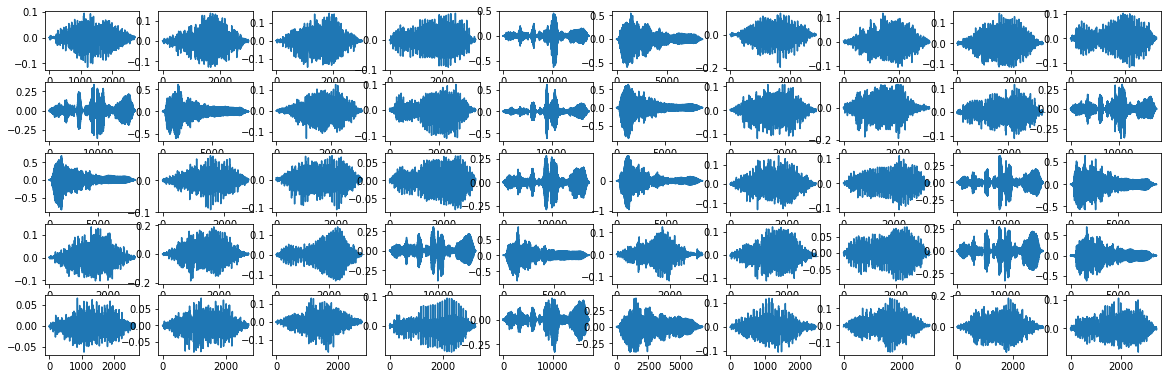

In [72]:
# Plot some audio syllables
sylls = syllable_df.audio.values

nrows = 5
ncols = 10
zoom = 2
fig, axs = plt.subplots(ncols=ncols, nrows = nrows,figsize = (ncols*zoom, nrows+zoom/1.5))
for i, syll in tqdm(enumerate(sylls), total = nrows*ncols):
    ax = axs.flatten()[i]
    ax.plot(syll)
    if i == nrows*ncols -1:
        break

# Spectrogram generation section


In [27]:
# Make spectrogram
from avgn.visualization.spectrogram import draw_spec_set
from avgn.visualization.spectrogram import draw_spec_set_actual
from avgn.signalprocessing.create_spectrogram_dataset import make_spec, mask_spec, log_resize_spec, pad_spectrogram
from avgn.visualization.spectrogram import plot_spec, visualize_spec

from avgn.utils.audio import load_wav, read_wav
from avgn.signalprocessing.filtering import butter_bandpass_filter
from avgn.signalprocessing.spectrogramming import spectrogram

In [73]:
(dataset.wav_files[10].as_posix())

'/content/Nest-Seq-Analysis/data/processed/zebra_finch_sakata/2021-07-08_02-57-54/WAV/ttog_0019.WAV'

In [74]:
#### -----------   Plotting a sample data file --------------------- ####
rate, data_loaded = load_wav(dataset.wav_files[10])
data = data_loaded
times = np.linspace(0,len(data)/rate,len(data));

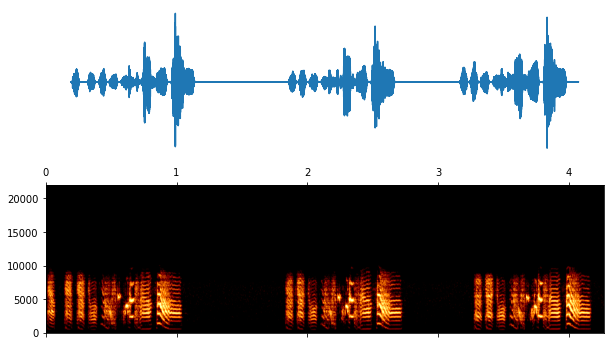

In [76]:
# Plot audio and spectrogram of sample audio file
# filter data
butter_min = hparams.butter_lowcut
butter_max = hparams.butter_highcut
data = butter_bandpass_filter(data, butter_min, butter_max, rate)

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(10, 6))
axs[0].set_axis_off()
axs[0].get_tightbbox('True')
axs[0].plot(times,data)
# ax[0].axis('off')


hparams.sample_rate = rate

hparams.ref_level_db = 60
spec_orig = spectrogram(data,
                            rate,
                            hparams)
plot_spec(
    norm(spec_orig),
    fig=fig,
    ax=axs[1],
    rate=rate,
    hop_len_ms=hparams.hop_length_ms,
    cmap=plt.cm.afmhot,
    show_cbar=False,
    figsize=(10, 6),
)

In [75]:
syllables_wav = syllable_df.audio.values
syllables_rate = syllable_df.rate.values

In [77]:
np.shape(syllables_wav)

(1208,)

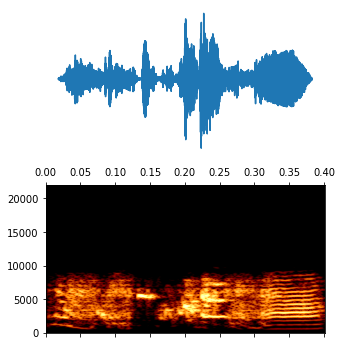

In [78]:
###  ---  Indivdual audio snippet  ----   ###
i=50

spec = spectrogram(syllables_wav[i], syllables_rate[i], hparams)

times = np.linspace(0,len(syllables_wav[i])/syllables_rate[i],len(syllables_wav[i]));

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(5, 6))
axs[0].set_axis_off()
axs[0].get_tightbbox('True')
axs[0].plot(times,syllables_wav[i])

plot_spec(
    norm(spec),
    fig=fig,
    ax=axs[1],
    rate=syllables_rate[i],
    hop_len_ms=hparams.hop_length_ms,
    cmap=plt.cm.afmhot,
    show_cbar=False,
    figsize=(5, 6),
)

In [ ]:
# ### --- Displays specs in sequence of windows --- ###

# for i in range(0,50):
#     fig, axs = plt.subplots(nrows=1,ncols=1, figsize=(5, 6))
#     plot_spec(
#         norm(syllable_df.spectrogram.values[i]),
#         fig=fig,
#         ax=axs,
#         rate=syllables_rate[i],
#         hop_len_ms=hparams.hop_length_ms,
#         cmap=plt.cm.afmhot,
#         show_cbar=False,
#         figsize=(5, 6),
#     )
#     plt.title(i)
#     plt.show(block=False)
#     plt.pause(0.5)
#     plt.close()

In [79]:
### --- Compute Spectrograms --- ###

with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    # create spectrograms
    syllables_spec = parallel(
        delayed(spectrogram)(
            syllable,
            rate,
            hparams=dataset.hparams
        #     mel_matrix=dataset.mel_matrix,
        #     use_mel=True,
        #     use_tensorflow=False,
         )
        for syllable, rate in tqdm(
            zip(syllables_wav, syllables_rate),
            total=len(syllables_rate),
            desc="getting syllable spectrograms",
            leave=False,
        )
    )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=4096 is too small for input signal of length=2715
  n_fft, y.shape[-1]
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=4096 is too small for input signal of length=3014
  n_fft, y.shape[-1]
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=4096 is too small for input signal of length=3022
  n_fft, y.shape[-1]
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=4096 is too small for input signal of length=3271
  n_fft, y.shape[-1]
[Parallel(n_jobs=1)]: Done   4 out of   4 |

In [ ]:
# draw_spec_set_actual(syllables_spec, zoom=1, maxrows=10, colsize=25)

In [ ]:
# ####  -----------  Rescaling --------  #### (Avoid this if possible)
    
# log_scaling_factor = 4

# with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
#     syllables_spec = parallel(
#         delayed(log_resize_spec)(spec, scaling_factor=log_scaling_factor)
#         for spec in tqdm(syllables_spec, desc="scaling spectrograms", leave=False)
#     )  

In [80]:
syll_lens = [np.shape(i)[1] for i in syllables_spec]
pad_length = np.max(syll_lens) # Set this as 467 based on Nest 2
print(pad_length)
if pad_length < 467:
  pad_length = 467
else:
  print('New syllable with longer syllable length found')

421


In [81]:
pad_length

467

In [82]:
###  Discards the top half of frequency range ###

def freq_range_reduction(spec, yrange=0.5):
    ylim = int(np.floor(spec.shape[0]*yrange))
    spec = spec[:ylim,:]
    return spec

with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    
    syllables_spec = parallel(
        delayed(freq_range_reduction)(spec, yrange=0.5)
        for spec in tqdm(
            syllables_spec, desc="resizing spectrogram frequency", leave=False
        )
    )
# np.shape(syllables_spec)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1208 out of 1208 | elapsed:    0.1s finished


In [83]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:

    syllables_spec = parallel(
        delayed(pad_spectrogram)(spec, pad_length)
        for spec in tqdm(
            syllables_spec, desc="padding spectrograms", leave=False
        )
    )
np.shape(syllables_spec)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1208 out of 1208 | elapsed:    2.8s finished


(1208, 1024, 467)

In [84]:
### To save space back to dataframe
syllables_spec = [(norm(i)*255).astype('uint8') for i in tqdm(syllables_spec)]
syllable_df['spectrogram'] = syllables_spec

In [85]:
save_loc = DATA_DIR / 'syllable_dfs' / DATASET_ID / 'zf_Nest5_noRescale.pickle'

In [86]:
save_loc

PosixPath('/content/Nest-Seq-Analysis/data/syllable_dfs/zebra_finch_sakata/zf_Nest5_noRescale.pickle')

In [87]:
syllable_df.reset_index(drop=True, inplace=True)

In [88]:
syllable_df

,start_time,end_time,labels,indv,indvi,key,audio,rate,spectrogram
0,0.090219,0.151783,i,ttog,1,ttog_0012,"[-0.00017775803, 8.467357e-06, 5.4927576e-05, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0.186387,0.254731,i,ttog,2,ttog_0012,"[0.0014492568, 0.001327202, 0.0010414465, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0.271715,0.340241,i,ttog,3,ttog_0012,"[0.00057293667, 0.00040001346, 0.00019943516, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0.359720,0.433892,a,ttog,4,ttog_0012,"[-0.00032641325, -0.0004420503, -0.00043612465...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0.458405,0.854754,b,ttog,5,ttog_0012,"[0.0033812039, 0.0036342381, 0.0033554344, 0.0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...,...
1203,7.790454,7.855692,-,ttog,28,ttog_0002,"[7.613921e-06, 0.00039439645, -0.000219392, -0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1204,7.881134,7.946893,-,ttog,29,ttog_0002,"[0.0003486598, 3.1747815e-05, -0.00021428091, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1205,7.970726,8.043787,-,ttog,30,ttog_0002,"[-0.006481275, -0.005286367, -0.0028302197, -0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1206,8.072630,8.470635,-,ttog,31,ttog_0002,"[0.005190153, 0.0057454286, 0.0057890974, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [89]:
ensure_dir(save_loc)
syllable_df.to_pickle(save_loc)

In [90]:
## For direct saving to google drive
syllable_df.to_pickle('/content/gdrive/My Drive/ZFDataset/'+'zf_Nest5_noRescale.pickle')

In [ ]:
del syllable_df

In [91]:
pd.read_pickle('/content/Nest-Seq-Analysis/data/syllable_dfs/zebra_finch_sakata/zf_Nest4_noRescale.pickle')

,start_time,end_time,labels,indv,indvi,key,audio,rate,spectrogram
0,0.190428,0.241086,i,gthh,1,gthh_0011,"[0.0072043934, 0.0075306967, 0.0070742657, 0.0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0.291562,0.344124,a,gthh,2,gthh_0011,"[0.0033425759, 0.0036643278, 0.0033675095, 0.0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0.376279,0.602492,b,gthh,3,gthh_0011,"[-0.0070047914, -0.0076078335, -0.008018323, -...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0.645961,0.743149,c,gthh,4,gthh_0011,"[0.005392619, 0.005975974, 0.0071191886, 0.007...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0.756936,0.940791,d,gthh,5,gthh_0011,"[0.0022676613, -0.00297497, -0.007925726, -0.0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...,...
1188,0.248738,0.294770,i,gthh,2,gthh_0030,"[0.0018945934, -4.4041597e-05, -0.0014835176, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1189,0.355314,0.405155,a,gthh,3,gthh_0030,"[0.00080393214, 0.0010610136, 0.0011871265, 0....",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1190,0.441822,0.663296,b,gthh,4,gthh_0030,"[-0.00039143433, -0.00030651106, 0.00012114198...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1191,0.710756,0.805790,c,gthh,5,gthh_0030,"[0.016255975, 0.011684088, 0.0056451773, 0.001...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
